In [1]:
import SimpleITK as sitk
import numpy as np

In [4]:
img_obj = sitk.ReadImage("/home/yeep/dataset/3d/SPH/imagesTr/00091411260071_t1_fs_tse_rs_tra_0_0_0_axial_20141128.nii.gz")
img_numpy = sitk.GetArrayFromImage(img_obj)

In [5]:
def autofit_contrast(img_numpy:np.ndarray, bins=40):
    frequency,intensity = np.histogram(img_numpy, bins=bins)
    accum = 0
    goal = img_numpy.size / 1000
    front_idx = 0
    while front_idx <= len(frequency):
        if accum + frequency[front_idx]<goal:
            accum += frequency[front_idx]    
        else:
            break
        front_idx+=1
    low = intensity[front_idx]

    end_idx = len(frequency) - 1
    accum = 0
    while end_idx >=0:
        if accum + frequency[end_idx] < goal:
            accum += frequency[end_idx]    
        else:
            break
        end_idx-=1

    high = intensity[end_idx+1]
    if low >= high:
        low = intensity[0]
        high = intensity[-1]
    
    return np.clip(img_numpy,a_min=low,a_max=high)

In [6]:
out = autofit_contrast(img_numpy)

In [22]:
out.max()

1599.5

In [7]:
import matplotlib.pyplot as plt

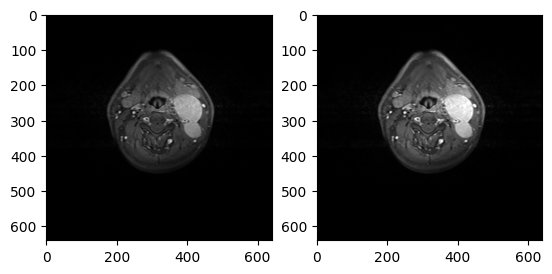

In [12]:
plt.subplot(1,2,1)
plt.imshow(img_numpy[16],cmap="gray")
plt.subplot(1,2,2)
plt.imshow(out[16],cmap="gray")

In [14]:
from skimage import exposure

In [26]:
def autofit_contrast(image):
    cdf,intensity = exposure.cumulative_distribution(image=image,nbins=40)
    idx =len(cdf) - 1
    while idx>=0 and cdf[idx] >= 0.999:
        idx-=1
    high = intensity[idx]
    idx = 0
    while idx < len(cdf) and cdf[idx] <=0.001:
        idx +=1
    low = intensity[idx]
    if low > high:
        low = intensity[0]
        high = intensity[-1]
    return np.clip(image, low, high)

In [28]:
img = autofit_contrast(img_numpy)

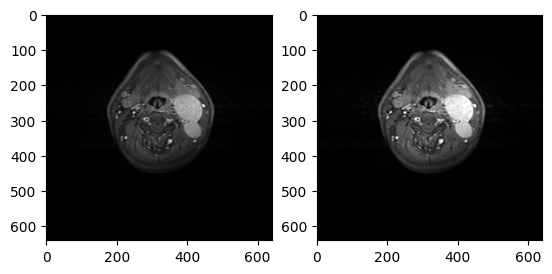

In [29]:
plt.subplot(1,2,1)
plt.imshow(img_numpy[16],cmap="gray")
plt.subplot(1,2,2)
plt.imshow(img[16],cmap="gray")